## SMS Spam Classifier: Multinomial Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes
    - Model building 
    - Model evaluation

### 1. Importing and Preprocessing Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
docs = pd.read_table(r"C:\Users\Sanskar Gupta\Desktop\upgrade\Upgrad-MS-Course\Naive Bayes\Naive Bayes SMS Classifier Model\data_files\SMSSpamCollection", header=None, names=['Class', 'sms'])
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
docs.shape

(5572, 2)

In [4]:
# Lets convert this dataframe into numpy array
spam_ham_array = docs.Class.value_counts()
spam_ham_array

ham     4825
spam     747
Name: Class, dtype: int64

In [5]:
# Let's see the total percentage share of the spam in the whole  data.
print("The total percentage share of the spam in the data is : {0}%".format(round((spam_ham_array[1]/len(docs)) * 100 )))

The total percentage share of the spam in the data is : 13%


### We can see that there are 13% Spam records available in the data.
<br>
Now Let's create the label of the Class values of the dataframe. Format -> {'ham':0, 'spam':1}

In [6]:
docs['label'] = docs.Class.map({'ham':0, 'spam':1})

In [7]:
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
# we can now drop the column 'Class'
docs = docs.drop('Class', axis=1)
docs.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
# Now let's convert data into x and y
X = docs.sms
y = docs.label
print(len(X), len(y))

5572 5572


In [10]:
# Now let's split the data into Train set and test set using sklearnn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
X_train

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
                              ...                        
905     We're all getting worried over here, derek and...
5192    Oh oh... Den muz change plan liao... Go back h...
3980    CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
235     Text & meet someone sexy today. U can find a d...
5157                              K k:) sms chat with me.
Name: sms, Length: 4179, dtype: object

In [12]:
X_test

1078                         Yep, by the pretty sculpture
4028        Yes, princess. Are you going to make me moan?
958                            Welp apparently he retired
4642                                              Havent.
4674    I forgot 2 ask ü all smth.. There's a card on ...
                              ...                        
3207                                        At home also.
4655                     Hope you are having a great day.
1140    Message:some text missing* Sender:Name Missing...
1793    WIN: We have a winner! Mr. T. Foley won an iPo...
1710    U meet other fren dun wan meet me ah... Muz b ...
Name: sms, Length: 1393, dtype: object

In [13]:
y_train

710     1
3740    0
2711    1
3155    1
3748    0
       ..
905     0
5192    0
3980    0
235     1
5157    0
Name: label, Length: 4179, dtype: int64

In [14]:
y_test

1078    0
4028    0
958     0
4642    0
4674    0
       ..
3207    0
4655    0
1140    0
1793    1
1710    0
Name: label, Length: 1393, dtype: int64

### We have successfullly splited our data into Train and Test sets. Now let's create vector array using sklearn's CountVectorizer method

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [16]:
vect

CountVectorizer(stop_words='english')

In [17]:
# Now let's fit this class object to X_train.
vect = vect.fit(X_train)

In [18]:
# vocab size
len(vect.vocabulary_.keys())

7204

In [19]:
# Now let's transforming the X_train and X_test
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [20]:
X_train_transformed

<4179x7204 sparse matrix of type '<class 'numpy.int64'>'
	with 32467 stored elements in Compressed Sparse Row format>

In [21]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6673)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7134)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


### 2. Building and Evaluating the Model

In [22]:
# Lets import MultinomialNB class from sklearn module.
from sklearn.naive_bayes import MultinomialNB

# let's create a object of  this class.
mnb_obj = MultinomialNB()

# Let's fit this on X_train, y_train data.
mnb_obj.fit(X_train_transformed, y_train)

# Now Let's predict the results.
y_pred_class = mnb_obj.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb_obj.predict_proba(X_test_transformed)


In [23]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Model Evaluation

In [24]:
# let's check the accuracy score of our model ...

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

### As we see  our model has 0.9877 as accuracy score. Now let's create the confusion matrix and start ths evaluation.

In [25]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)
confusion

array([[1201,    7],
       [  10,  175]], dtype=int64)

In [26]:
# Now lets create our TN, TP, FN, FP
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [27]:
# Let's calculate the True Positive rate or Sensitivity.
senstivity = TP/(TP + FN)
senstivity

0.9459459459459459

In [28]:
# Let's calculate the True Nagetive rate or Specificity.
specificity = TN/(TN + FP)
specificity

0.9942052980132451

In [29]:
# Precession 
precision = TP / (TP + FP)
print(precision)

metrics.precision_score(y_test, y_pred_class)

0.9615384615384616


0.9615384615384616

In [30]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9615384615384616
PRECISION SCORE : 0.9615384615384616
RECALL SCORE : 0.9459459459459459
F1 SCORE : 0.9536784741144414


### Now let's create  the ROC curve

In [31]:
# import roc curve class
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [32]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [33]:
# Let's create a df of these values for simple understanding.
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.308108,0.000000
2,1.000000e+00,0.313514,0.000000
3,1.000000e+00,0.335135,0.000000
4,1.000000e+00,0.340541,0.000000
...,...,...,...
105,6.325596e-13,1.000000,0.959437
106,6.086604e-13,1.000000,0.961093
107,4.174215e-14,1.000000,0.970199
108,3.968331e-14,1.000000,0.972682


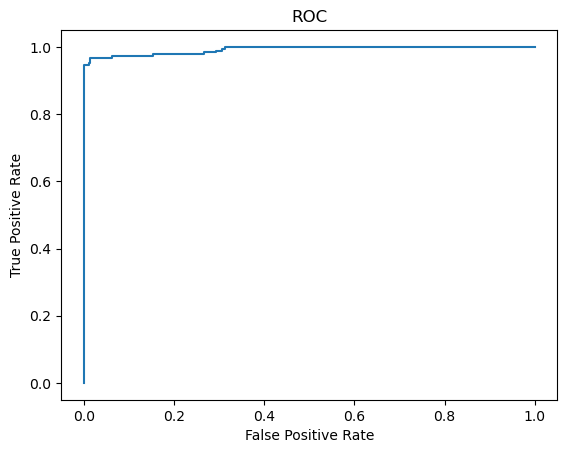

In [34]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)